In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd

mnist = keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

**MNIST**

In [ ]:
mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

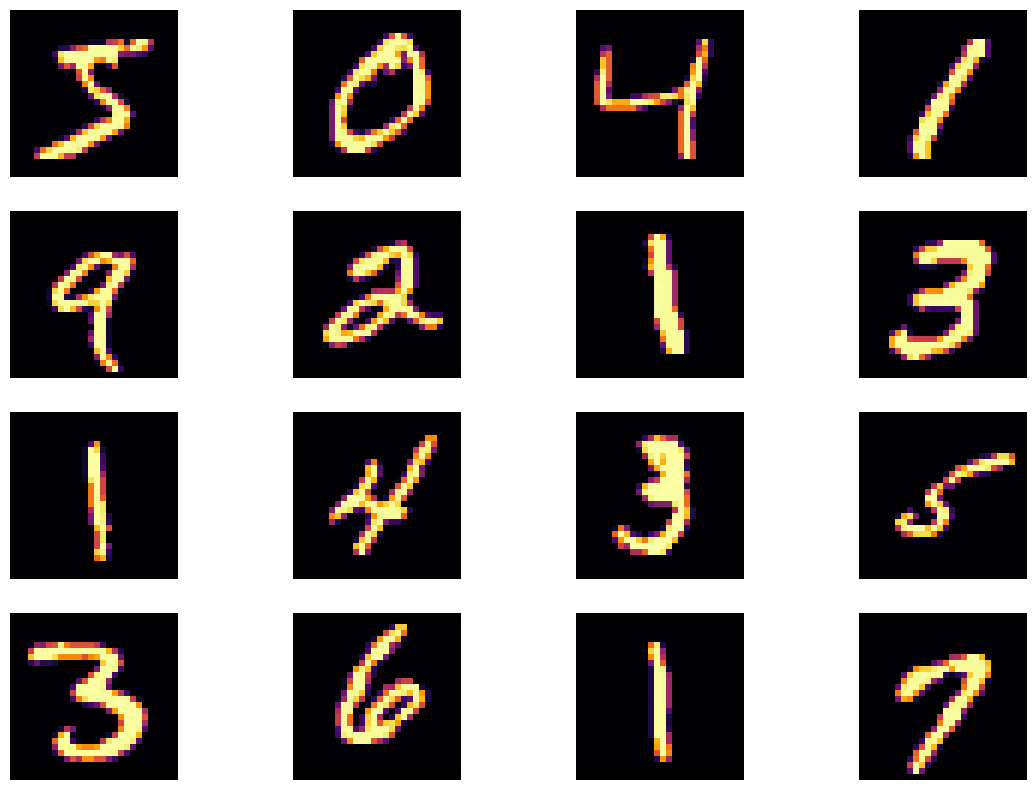

In [ ]:
plt.figure(figsize=(14, 10))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(x_train[i], cmap='inferno')
  plt.axis('off')
plt.show()

Предобработка

In [ ]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

Создаём сеть

In [ ]:
model=keras.Sequential([
                      keras.layers.Flatten(input_shape=(28, 28)),
                      keras.layers.Dense(350, activation='relu'),
                      keras.layers.Dense(128, activation='relu'),
                      keras.layers.Dense(10, activation='softplus')
                        ])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 350)               274750    
                                                                 
 dense_43 (Dense)            (None, 128)               44928     
                                                                 
 dense_44 (Dense)            (None, 10)                1290      
                                                                 
Total params: 320968 (1.22 MB)
Trainable params: 320968 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
history=model.fit(x_train,y_train,
          batch_size=128,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.3140 - sparse_categorical_accuracy: 0.9141 - val_loss: 0.1410 - val_sparse_categorical_accuracy: 0.9598
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1181 - sparse_categorical_accuracy: 0.9643 - val_loss: 0.1129 - val_sparse_categorical_accuracy: 0.9661
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0774 - sparse_categorical_accuracy: 0.9770 - val_loss: 0.1025 - val_sparse_categorical_accuracy: 0.9672
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0558 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.0869 - val_sparse_categorical_accuracy: 0.9750
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0400 - sparse_categorical_accuracy: 0.9882 - val_loss: 0.0909 - val_sparse_categorical_accuracy: 0.9738
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0307 - sparse_cate

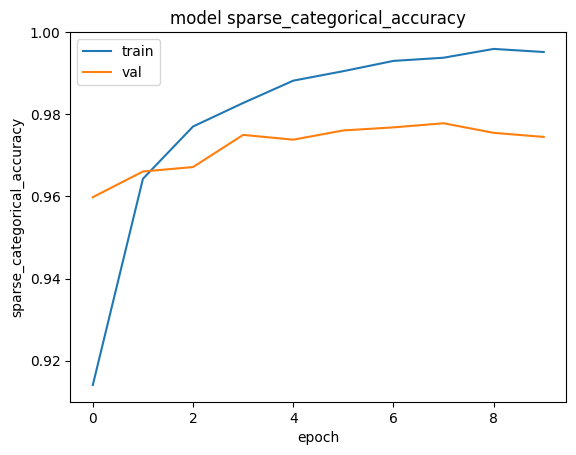

In [ ]:
# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model sparse_categorical_accuracy')
plt.ylabel('sparse_categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

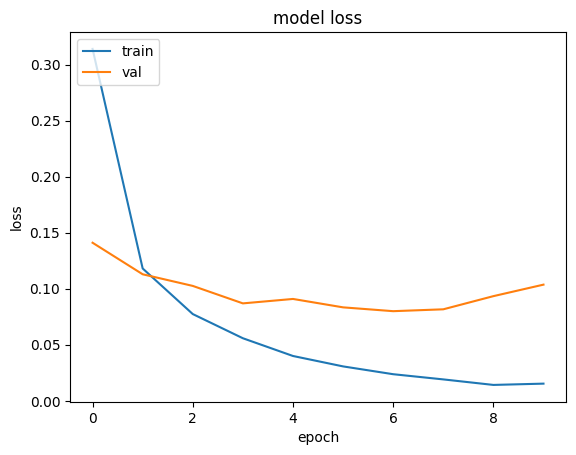

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0934 - sparse_categorical_accuracy: 0.9752


In [ ]:
prediction1=model.predict(x_test)
prediction1

313/313 [==============================] - 1s 3ms/step


array([[2.69293778e-08, 5.99968653e-09, 7.82657850e-08, ...,
        1.74745023e+00, 1.61025969e-06, 2.84487243e-07],
       [9.25331589e-10, 2.98415694e-06, 2.00495553e+00, ...,
        1.86641013e-13, 6.73567183e-06, 3.09679843e-12],
       [9.06955620e-07, 1.13300359e+00, 7.67274287e-07, ...,
        3.42614157e-06, 5.45956485e-04, 1.71479513e-07],
       ...,
       [1.33704527e-12, 4.28355434e-10, 4.06946720e-13, ...,
        7.36364569e-08, 2.26719990e-07, 3.45518202e-07],
       [3.69582837e-12, 2.45511233e-11, 2.18532400e-13, ...,
        6.28601615e-11, 1.04294578e-03, 1.14674858e-11],
       [4.48647519e-09, 4.89909627e-14, 4.28698906e-13, ...,
        8.08759168e-17, 1.01899005e-08, 3.76280387e-12]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

Постройте матрицу ошибок, выведите значения метрик

In [ ]:
pred1_argmax = np.argmax(prediction1, axis=1)
pd.crosstab(y_test, pred1_argmax)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,971,1,0,0,1,2,3,1,1,0
1,0,1114,4,1,0,1,1,0,14,0
2,3,0,993,1,2,0,2,4,27,0
3,1,1,1,983,0,2,0,4,17,1
4,0,0,1,0,972,0,5,0,0,4
5,2,0,0,10,1,866,4,1,6,2
6,1,2,0,1,5,3,943,0,3,0
7,2,6,12,3,3,0,0,992,8,2
8,0,0,2,2,4,1,2,2,960,1


In [ ]:
print('Accuracy: ', accuracy_score(y_test, pred1_argmax))
print('\n', classification_report(y_test, pred1_argmax))

Accuracy:  0.9752

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.98      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.91      0.99      0.95       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Fasion MNIST**

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


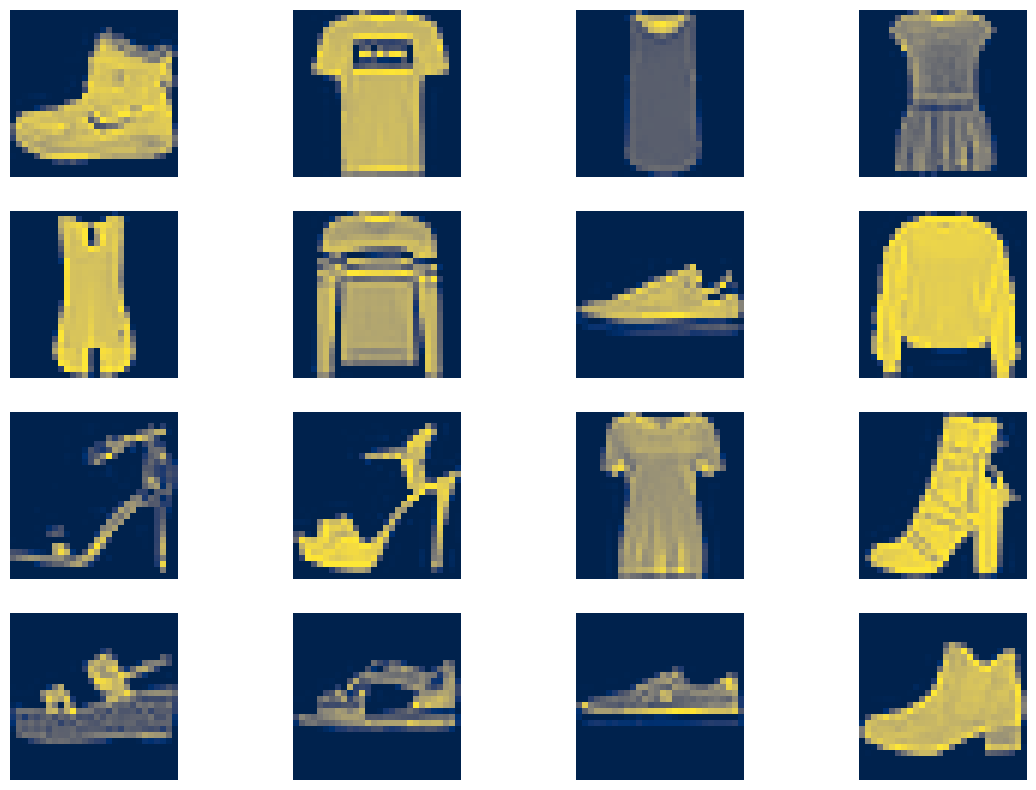

In [ ]:
plt.figure(figsize=(14, 10))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(x_train[i], cmap='cividis')
  plt.axis('off')
plt.show()

In [ ]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [ ]:
model2=keras.Sequential([
                      keras.layers.Flatten(input_shape=(28, 28)),
                      keras.layers.Dense(350, activation='relu'),
                      keras.layers.Dense(128, activation='relu'),
                      keras.layers.Dense(64, activation='relu'),
                      keras.layers.Dense(10, activation='sigmoid')
                        ])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 350)               274750    
                                                                 
 dense_12 (Dense)            (None, 128)               44928     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 328584 (1.25 MB)
Trainable params: 328584 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
history2=model2.fit(x_train,y_train,
          batch_size=128,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 13ms/step - loss: 0.5393 - sparse_categorical_accuracy: 0.8081 - val_loss: 0.4376 - val_sparse_categorical_accuracy: 0.8436
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.3794 - sparse_categorical_accuracy: 0.8608 - val_loss: 0.3896 - val_sparse_categorical_accuracy: 0.8603
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.3352 - sparse_categorical_accuracy: 0.8770 - val_loss: 0.3572 - val_sparse_categorical_accuracy: 0.8716
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.3102 - sparse_categorical_accuracy: 0.8842 - val_loss: 0.3239 - val_sparse_categorical_accuracy: 0.8832
Epoch 5/10
375/375 [==============================] - 5s 15ms/step - loss: 0.2896 - sparse_categorical_accuracy: 0.8931 - val_loss: 0.3431 - val_sparse_categorical_accuracy: 0.8763
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2761 - sparse_cate

Попробуйте другие параметры оптимизаторов, метрик, других структур сетей

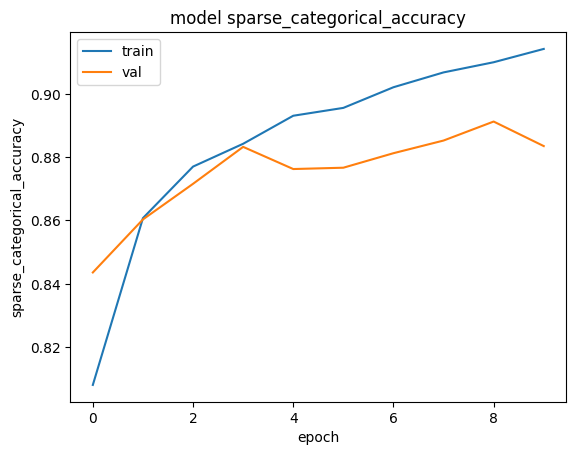

In [ ]:
# summarize history for accuracy
plt.plot(history2.history['sparse_categorical_accuracy'])
plt.plot(history2.history['val_sparse_categorical_accuracy'])
plt.title('model sparse_categorical_accuracy')
plt.ylabel('sparse_categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

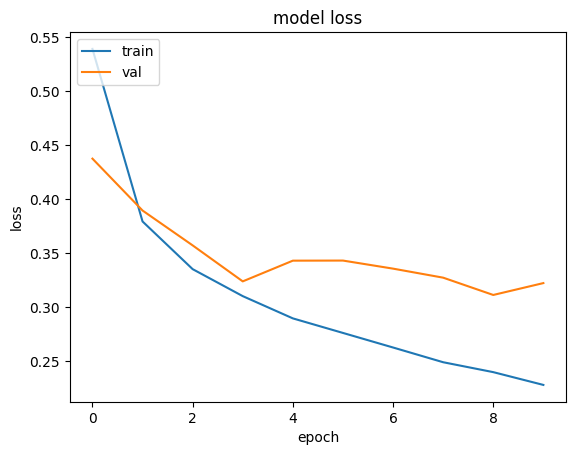

In [ ]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_loss2,test_acc2=model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3427 - sparse_categorical_accuracy: 0.8777


In [ ]:
prediction2=model2.predict(x_test)
prediction2

313/313 [==============================] - 2s 5ms/step


array([[1.5941827e-01, 1.4131884e-02, 1.3573836e-02, ..., 9.4717848e-01,
        3.3597171e-02, 9.9950016e-01],
       [8.2467312e-01, 1.0560809e-02, 9.9999696e-01, ..., 2.4055902e-07,
        3.1471443e-03, 1.5857180e-04],
       [8.5149413e-01, 1.0000000e+00, 5.9494952e-04, ..., 7.7391220e-03,
        1.8346303e-03, 1.6842005e-04],
       ...,
       [7.8314668e-01, 9.5141365e-04, 7.1570493e-02, ..., 1.4674877e-01,
        9.9998546e-01, 5.6971501e-05],
       [4.5982206e-01, 9.9999994e-01, 4.3658507e-03, ..., 1.7003946e-01,
        5.3911754e-03, 9.1487598e-03],
       [2.4139071e-02, 3.9215083e-03, 1.9262394e-02, ..., 5.9251595e-01,
        4.0309271e-01, 3.1611707e-02]], dtype=float32)

In [ ]:
pred2_argmax = np.argmax(prediction2, axis=1)
pd.crosstab(y_test, pred2_argmax)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,770,8,17,41,4,0,151,0,9,0
1,1,974,3,18,2,0,1,0,1,0
2,9,3,811,21,105,0,50,0,1,0
3,9,12,8,923,27,0,18,0,3,0
4,0,2,114,38,824,0,22,0,0,0
5,0,0,0,0,0,971,0,14,1,14
6,81,2,108,43,107,0,651,0,8,0
7,0,0,0,0,0,31,0,914,0,55
8,3,2,6,6,6,3,5,2,967,0


In [ ]:
print('Accuracy: ', accuracy_score(y_test, pred2_argmax))
print('\n', classification_report(y_test, pred2_argmax))

Accuracy:  0.8778

               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.76      0.81      0.78      1000
           3       0.85      0.92      0.88      1000
           4       0.77      0.82      0.79      1000
           5       0.96      0.97      0.97      1000
           6       0.72      0.65      0.69      1000
           7       0.96      0.91      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



**CIFAR10**

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

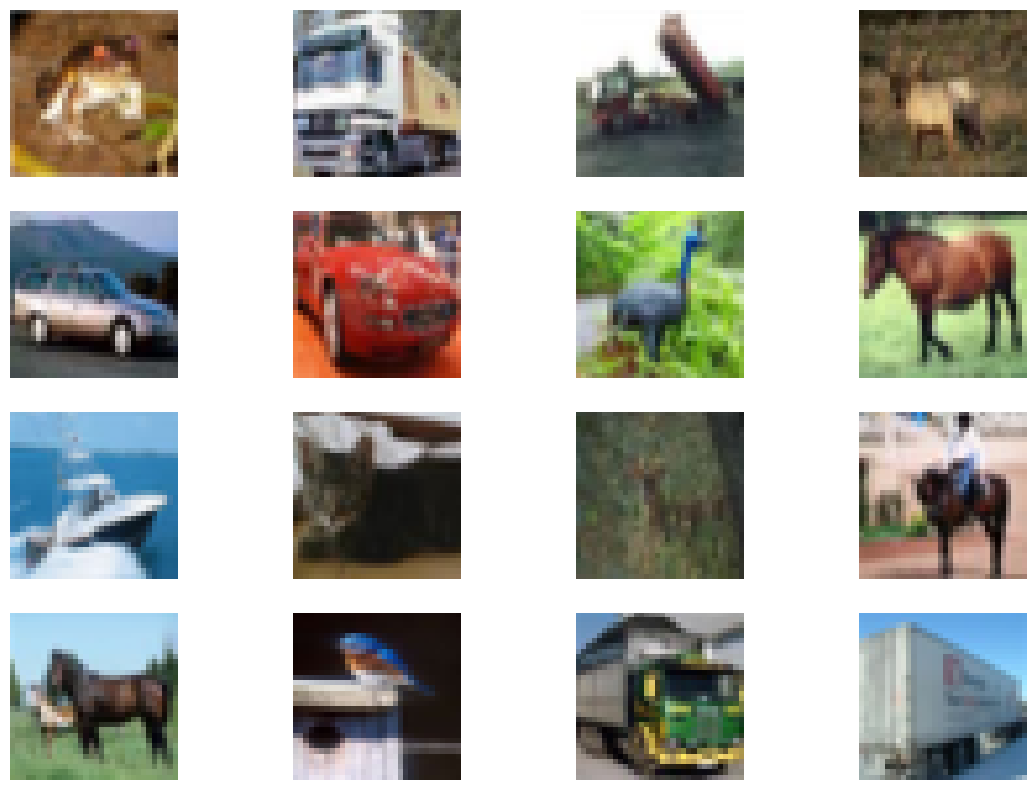

In [ ]:
plt.figure(figsize=(14, 10))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(x_train[i])
  plt.axis('off')
plt.show()

In [ ]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [ ]:
model3=keras.Sequential([
                      keras.layers.Flatten(input_shape=(32, 32, 3)),
                      keras.layers.Dense(1024, activation='relu'),
                      keras.layers.Dense(512, activation='relu'),
                      keras.layers.Dense(128, activation='relu'),
                      keras.layers.Dense(64, activation='relu'),
                      keras.layers.Dense(10, activation='sigmoid')
                        ])

In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
Total params: 3746122 (14.29 MB)
Trainable params: 374

In [ ]:
model3.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
history3=model3.fit(x_train,y_train,
          batch_size=128,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 40s 118ms/step - loss: 2.0469 - sparse_categorical_accuracy: 0.2577 - val_loss: 1.8465 - val_sparse_categorical_accuracy: 0.3391
Epoch 2/10
313/313 [==============================] - 34s 109ms/step - loss: 1.7561 - sparse_categorical_accuracy: 0.3673 - val_loss: 1.7681 - val_sparse_categorical_accuracy: 0.3697
Epoch 3/10
313/313 [==============================] - 29s 91ms/step - loss: 1.6611 - sparse_categorical_accuracy: 0.4030 - val_loss: 1.6949 - val_sparse_categorical_accuracy: 0.3920
Epoch 4/10
313/313 [==============================] - 31s 98ms/step - loss: 1.5976 - sparse_categorical_accuracy: 0.4281 - val_loss: 1.6766 - val_sparse_categorical_accuracy: 0.4084
Epoch 5/10
313/313 [==============================] - 29s 93ms/step - loss: 1.5439 - sparse_categorical_accuracy: 0.4457 - val_loss: 1.5927 - val_sparse_categorical_accuracy: 0.4341
Epoch 6/10
313/313 [==============================] - 31s 99ms/step - loss: 1.4970 - spa

Попробуйте другие параметры оптимизаторов, метрик, других структур сетей

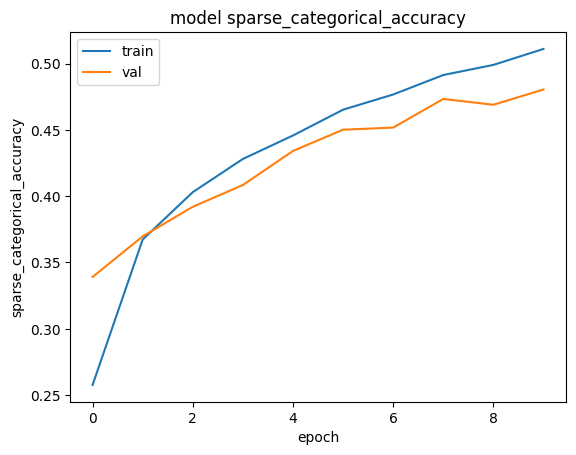

In [ ]:
# summarize history for accuracy
plt.plot(history3.history['sparse_categorical_accuracy'])
plt.plot(history3.history['val_sparse_categorical_accuracy'])
plt.title('model sparse_categorical_accuracy')
plt.ylabel('sparse_categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

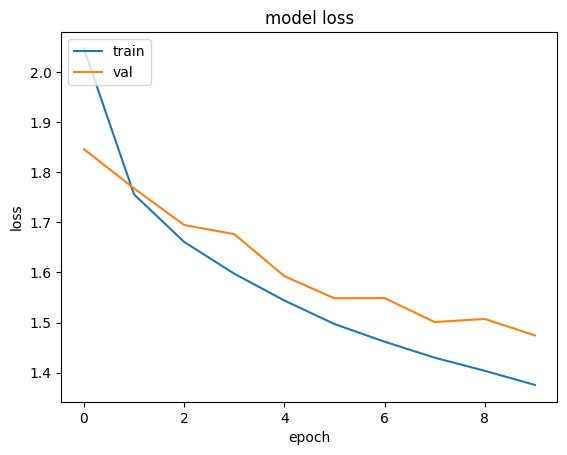

In [ ]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_loss3,test_acc3=model3.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.4483 - sparse_categorical_accuracy: 0.4905


In [ ]:
prediction3=model3.predict(x_test)
prediction3

313/313 [==============================] - 5s 15ms/step


array([[0.47337583, 0.5084757 , 0.5187936 , ..., 0.08389292, 0.5654226 ,
        0.22963338],
       [0.8186412 , 0.96141964, 0.14554353, ..., 0.0493311 , 0.94563925,
        0.95345956],
       [0.8997779 , 0.8587004 , 0.16392513, ..., 0.09583288, 0.9729482 ,
        0.84622574],
       ...,
       [0.03021137, 0.02556694, 0.6232494 , ..., 0.5300855 , 0.14245936,
        0.05560455],
       [0.11939071, 0.08109368, 0.6773047 , ..., 0.20286784, 0.0679469 ,
        0.04466954],
       [0.26843244, 0.06769786, 0.6027637 , ..., 0.8044363 , 0.05046129,
        0.05932313]], dtype=float32)

In [ ]:
pred3_argmax = np.argmax(prediction3, axis=1)
pd.crosstab(y_test.flatten(), pred3_argmax)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,526,25,46,43,32,8,44,44,210,22
1,49,654,9,52,10,13,26,26,80,81
2,80,26,301,135,125,38,178,64,45,8
3,22,23,71,428,47,103,210,38,39,19
4,52,11,132,74,390,20,190,81,43,7
5,19,12,76,327,65,247,148,62,37,7
6,3,10,52,86,100,18,675,26,20,10
7,41,21,44,90,87,62,58,559,19,19
8,91,78,8,37,14,7,19,16,698,32


In [ ]:
print('Accuracy: ', accuracy_score(y_test, pred3_argmax))
print('\n', classification_report(y_test, pred3_argmax))

Accuracy:  0.4905

               precision    recall  f1-score   support

           0       0.57      0.53      0.55      1000
           1       0.60      0.65      0.63      1000
           2       0.40      0.30      0.34      1000
           3       0.32      0.43      0.37      1000
           4       0.44      0.39      0.41      1000
           5       0.47      0.25      0.32      1000
           6       0.43      0.68      0.52      1000
           7       0.56      0.56      0.56      1000
           8       0.54      0.70      0.61      1000
           9       0.68      0.43      0.52      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000

